In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("x_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test_val.shape: ", X_test.shape)


170498071/170498071 [==============================] - 4s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000, 1)
x_test_val.shape:  (10000, 32, 32, 3)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

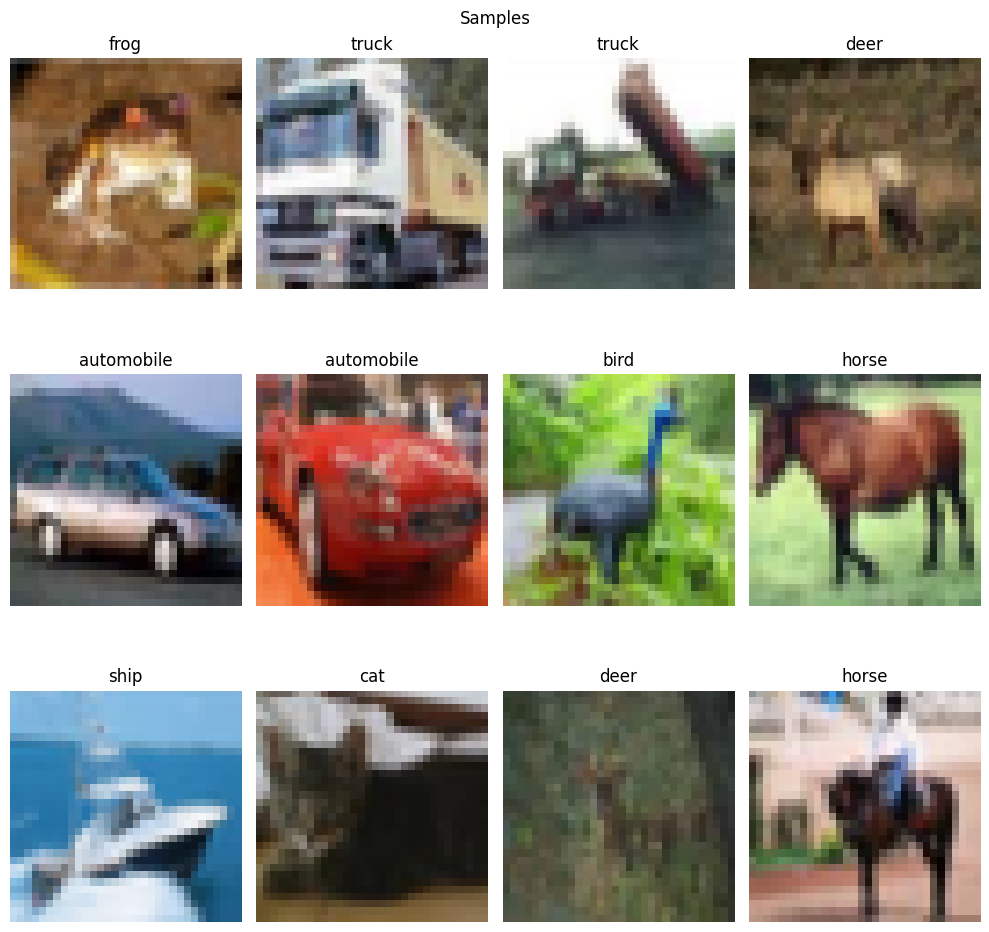

In [ ]:
import matplotlib.pyplot as plt

def show_samples(data, labels):
    fig, axes = plt.subplots(3, 4, figsize=(10, 10))

    axes = axes.flatten()

    for i in range(len(axes)):
        axes[i].imshow(data[i])
        class_index=labels[i][0]
        class_name=class_names[class_index]
        axes[i].set_title(class_name)
        axes[i].axis('off')
    plt.tight_layout()
    fig.suptitle("Samples")
    plt.show()
show_samples(X_train, y_train)


In [ ]:
#

In [ ]:
import random
import numpy as np
import tensorflow as tf
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'  ))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu' ))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 40
batch_size=128
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/40
391/391 [==============================] - 433s 1s/step - loss: 1.5789 - accuracy: 0.4221 - val_loss: 1.2354 - val_accuracy: 0.5620
Epoch 2/40
  1/391 [..............................] - ETA: 6:00 - loss: 1.1740 - accuracy: 0.5938

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print("Train Accuracy:", round(100*train_accuracy[-1],2))
print("Validation Accuracy:", round(100*val_accuracy[-1],2))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predictions=model.predict(X_test)
y_pred_classes = np.argmax(predictions, axis=1)
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=class_names, yticklabels=class_names)